## Question 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/Users/shabeggill/Downloads/startup_funding.csv')
data['CityLocation'].dropna(inplace=True)
data['CityLocation'].replace('Delhi','New Delhi',inplace=True)#replacing Delhi with New Delhi
data['CityLocation'].replace('bangalore','Bangalore',inplace=True)#replacing bangalore with Bangalore
a=data.CityLocation
splitted=a.str.split("/") #splitting startups with multiple locations on the basis of "/"
d={}
for ele in splitted:
    for i in ele:
        i=i.strip()#remove extra spacing
        #filtering only those locations which are desired
        if i=="New Delhi" or i=='Gurgaon' or i=='Bangalore' or i=='Mumbai' or i=='Noida': 
            d[i]=d.get(i,0)+1 #value of occurence of each location
#sorting in descending order
z=sorted(d,key=d.get,reverse=True) 
for i in z:
    print(i,d[i]) 


Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


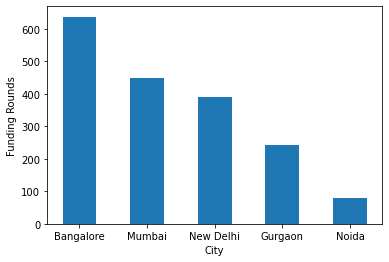

In [138]:
#if the we consider the locations New Delhi, Gurgaon and Noida as separate
funding=[]
city=[]
for i in z:
    funding.append(d[i]) #appending values of funding rounds
    city.append(i)       # appending names of locations
np_funding=np.array(funding)
for i in range(len(np_funding)):
    print(city[i],np_funding[i])
#Bar plot if the we consider the locations New Delhi, Gurgaon and Noida as separate
plt.bar(city,np_funding,width=0.5)
plt.xlabel('City')
plt.ylabel('Funding Rounds')
plt.show()

NCR 709
Bangalore 637
Mumbai 449


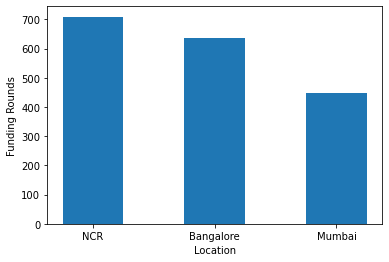

In [135]:
# if we consider the locations New Delhi, Gurgaon and Noida together as NCR 

#the 2nd,3rd and 4th indexed entried of np_funding array coresspond to New Delhi, Gurgaon and Noida
Ncrcount=np_funding[2]+np_funding[3]+np_funding[4] 
np_funding_new=np.array([Ncrcount,np_funding[0],np_funding[1]])
city_new=('NCR','Bangalore','Mumbai')
for i in range(len(np_funding_new)):
    print(city_new[i],np_funding_new[i])
# Bar plot if we consider the locations New Delhi, Gurgaon and Noida together as NCR 
plt.bar(city_new,np_funding_new,width=0.5)
plt.xlabel('Location')
plt.ylabel('Funding Rounds')
plt.show()

## EXPLANATION
We have to find that out of Bangalore, Mumbai and NCR (New Delhi, Noida, Gurgaon) which city receives funding maximum number of times, i.e. the frequency of funding.

So, first import the necessary libraries for the same which here are pandas, matplotlib and numpy
Now, the nan values need to be dropped from the ‘CityLocation’ column.

Next, we need to do some changes as specified in the question:
a. Change Delhi to New Delhi
b. Change bangalore to Bangalore

It has been mentioned in the question that for few startups multiple locations are given, one Indian and one Foreign. Since in some entries in the ‘CityLocation’ Column are of the form Delhi/US, they need to be split.Consider the startup if any one of the city lies in given locations. This is done using data.CityLocation.str.split("/"). We also need to strip the entry i.e. remove the initial spaces.


After that use a dictionary and get a count of the location only if it is one of the five mentioned cities. Sort the values in descending order. Also plot the bar graph for the same
As it can be seen, I have considered two scenarios.

a. We consider New Delhi, Noida and Gurgaon as separate locations. In this case we get the following values:

Bangalore 637

Mumbai 449

New Delhi 389

Gurgaon 241

Noida 79

Here, Bangalore is the location with maximum rounds of funding i.e. 637

b.We consider New Delhi, Noida and Gurgaon as one location i.e. NCR. In this case we get the following values:

NCR 709

Bangalore 637

Mumbai 449

Here, NCR is the location with maximum rounds of funding i.e. 709

## Question 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


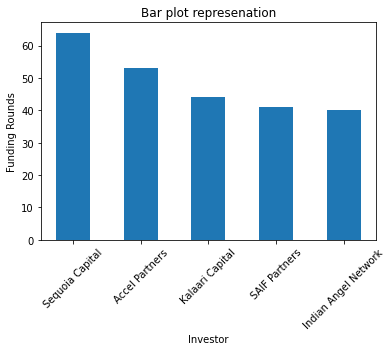

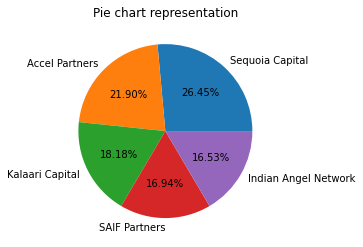

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/Users/shabeggill/Downloads/startup_funding.csv')
#removing those entries which have NaN values
df['InvestorsName'].dropna(inplace=True)
#splitting InvestorsNames on the basis of ",". 
#This is done as there are startups where multiple investors might have invested
splitted=df['InvestorsName'].str.split(",") 
d={}
for ele in splitted:
    for i in ele:
        i=i.strip()
        #getting ocurrence of investments
        d[i]=d.get(i,0)+1
#sorting in descending order
z=sorted(d,key=d.get,reverse=True)
for i in z[:5]: #printing top 5 investors
    print(i,d[i])
fund=[]
inv=[]
for i in z[:5]:
    fund.append(d[i]) #appending values of funding rounds
    inv.append(i)   # appending names of investors
plt.bar(inv,fund,width=0.5)
plt.xlabel('Investor')
plt.ylabel('Funding Rounds')
plt.title('Bar plot represenation')
plt.xticks(rotation=45)
plt.show()
plt.pie(fund,labels=inv,autopct='%.2f%%')
plt.title('Pie chart representation')
plt.show()

## EXPLANATION
We have to find the top 5 investors who have invested maximum number of times. 

So, first import the necessary libraries for the same which here are pandas, matplotlib and numpy
Now, the nan values need to be dropped from the ‘InvestorsName’ column.

It is mentioned in the question that in a startup, multiple investors might have invested. So consider each investor for that startup. This is done using df['InvestorsName'].str.split(",").

We then create a dictionary to keep count of the number of times each Investor appears/ invests. The unnecessary spaces are removed using strip(). We then sort the dictionary in descending order (z=sorted(d,key=d.get,reverse=True)) and print the first five entries as required.

The values of the five investors and the number of times each investor invests are appended in inv and fund arrays and these two arrays are then used for plotting the bar graph and pie chart as shown above.


## Question 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


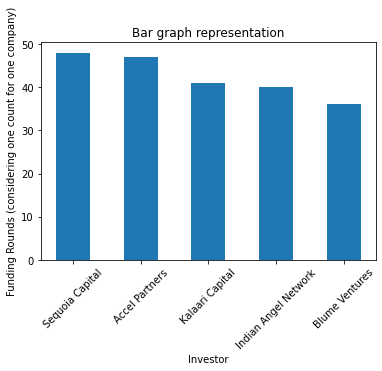

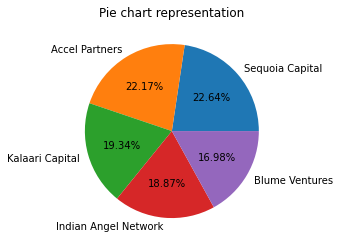

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/Users/shabeggill/Downloads/startup_funding.csv')
# making changes to the important startups as specified
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
#removing those entries which have NaN values
data.dropna(subset=['InvestorsName'],inplace=True)
#will give unique StartupName
a=data['StartupName'].unique() 
d={}
for startup in a:
    #creating separate dataframe for each unique startup
    s=data[data['StartupName']==startup] 
    x=[]
    def f(str):
        v=str.split(',')
        for i in v:
            i=i.strip()
            x.append(i)
    s['InvestorsName'].apply(f)
    y=pd.Series(x)
    y=y.unique()
    for ele in y:
        #excluding the Nan values
        if ele!="":
            d[ele]=d.get(ele,0)+1
z=sorted(d,key=d.get,reverse=True)
for i in z[:5]:
    print(i,d[i])
fund=[]
inv=[]
for i in z[:5]:
    inv.append(i)
    fund.append(d[i])
plt.bar(inv,fund,width=0.5)
plt.xlabel('Investor')
plt.ylabel('Funding Rounds (considering one count for one company)')
plt.xticks(rotation=45)
plt.title('Bar graph representation')
plt.show()
plt.pie(fund,labels=inv,autopct='%.2f%%')
plt.title('Pie chart representation')
plt.show()

## Explanation
We have to find the top 5 investors who have invested maximum number of times in different startups. 

So, first import the necessary libraries for the same which here are pandas, matplotlib and numpy.
Now, the nan values need to be dropped from the ‘InvestorsName’ column.

It is mentioned in the question that there are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm. These have been done using replace function.

Store all the unique names of the startup in variable a using the function unique().

It is mentioned in the question that in a startup, multiple investors might have invested. So consider each investor for that startup. This is done using split() and strip() and incorporating the changes in the column using apply as shown in the code.

Now a for loop runs for each startup stored in variable:
We create separate dataframe for each unique startup.First the rows are filtered for the startup selected. A function is applied on the ‘InvestorsName’ column and the corresponding values are stored in a dictionary with the key as the investor name and the value as the frequency of investing for startup chosen.The process is repeated for all the different startups. 

We then create a dictionary to keep count of the number of times each Investor appears/ invests. We then sort the dictionary in descending order (z=sorted(d,key=d.get,reverse=True)) and print the first five entries as required.

The values of the five investors and the number of times each investor invests are appended in inv and fund arrays and these two arrays are then used for plotting the bar graph and pie chart as shown above.


## Question 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


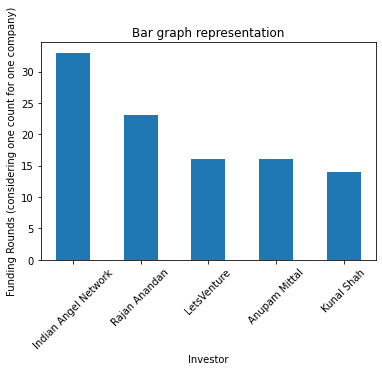

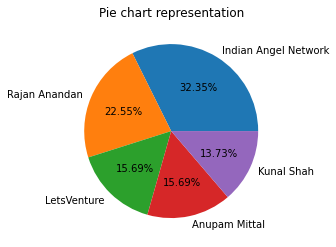

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/Users/shabeggill/Downloads/startup_funding.csv')
# making changes to the important startups as specified
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
data['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
#removing those entries which have NaN values
data.dropna(subset=['InvestorsName'],inplace=True)
data=data[(data.InvestmentType=='Seed Funding')|(data.InvestmentType=='Crowd Funding')]
#will give unique StartupName
a=data['StartupName'].unique() 
d={}
for startup in a:
     #creating separate dataframe for each unique startup
    s=data[data['StartupName']==startup]
    x=[]
    def f(str):
        v=str.split(',')
        for i in v:
            i=i.strip()
            x.append(i)
    s['InvestorsName'].apply(f)
    y=pd.Series(x)
    y=y.unique()
    for ele in y:
        #excluding the undisclosed investors
        if ele!="" and ele!='Undisclosed Investors': 
            d[ele]=d.get(ele,0)+1
z=sorted(d,key=d.get,reverse=True)
for i in z[:5]:
    print(i,d[i])
fund=[]
inv=[]
for i in z[:5]:
    inv.append(i)
    fund.append(d[i])
plt.bar(inv,fund,width=0.5)
plt.xlabel('Investor')
plt.ylabel('Funding Rounds (considering one count for one company)')
plt.xticks(rotation=45)
plt.title('Bar graph representation')
plt.show()
plt.pie(fund,labels=inv,autopct='%.2f%%')
plt.title('Pie chart representation')
plt.show()

## Explanation
We have to find the top 5 investors who have invested maximum number of times in different startups and their investment type is Crowdfunding or Seed Funding.

So, first import the necessary libraries for the same which here are pandas, matplotlib and numpy. Now, the nan values need to be dropped from the ‘InvestorsName’ column.

It is mentioned in the question that there are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". These have been done using replace function.

The data frame is filtered by considering only the Crowd funding and Seed Funding Investment Types. 
It is mentioned in the question that in a startup, multiple investors might have invested. So consider each investor for that startup. This is done using split() and strip() and incorporating the changes in the column using apply as shown in the code.

Storing all the unique names of the startup in variable a using the function unique().A for loop runs for each startup stored in variable: We create separate dataframe for each unique startup. First the rows are filtered for the startup selected. A function is applied on the ‘InvestorsName’ column and the corresponding values are stored in a dictionary with the key as the investor name and the value as the frequency of investing for startup chosen. The process is repeated for all the different startups.

We then create a dictionary to keep count of the number of times each Investor appears/ invests. We then sort the dictionary in descending order (z=sorted(d,key=d.get,reverse=True)) and print the first five entries as required.

The values of the five investors and the number of times each investor invests are appended in inv and fund arrays and these two arrays are then used for plotting the bar graph and pie chart as shown above.



## Question 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


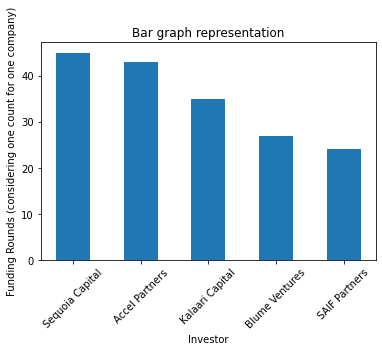

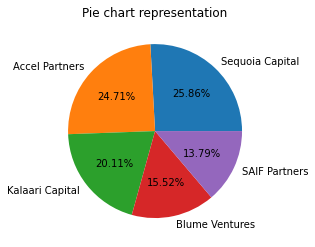

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/Users/shabeggill/Downloads/startup_funding.csv')
# making changes to the important startups as specified
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
data['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
#removing those entries which have NaN values
data.dropna(subset=['InvestorsName'],inplace=True)
data=data[(data.InvestmentType=='Private Equity')]
#will give unique StartupName
a=data['StartupName'].unique() 
d={}
for startup in a:
    #creating separate dataframe for each unique startup
    s=data[data['StartupName']==startup] 
    x=[]
    def f(str):
        v=str.split(',')
        for i in v:
            i=i.strip()
            x.append(i)
    s['InvestorsName'].apply(f)
    y=pd.Series(x)
    y=y.unique()
    for ele in y:
        #excluding the undisclosed investors
        if ele!="" and ele!='Undisclosed Investors': 
            d[ele]=d.get(ele,0)+1
z=sorted(d,key=d.get,reverse=True)
for i in z[:5]:
    print(i,d[i])
fund=[]
inv=[]
for i in z[:5]:
    inv.append(i)
    fund.append(d[i])
plt.bar(inv,fund,width=0.5)
plt.xlabel('Investor')
plt.ylabel('Funding Rounds (considering one count for one company)')
plt.xticks(rotation=45)
plt.title('Bar graph representation')
plt.show()
plt.pie(fund,labels=inv,autopct='%.2f%%')
plt.title('Pie chart representation')
plt.show()

## Explanation
We have to find the top 5 investors who have invested maximum number of times in different startups and their investment type is Private Equity.

So, first import the necessary libraries for the same which here are pandas, matplotlib and numpy. Now, the nan values need to be dropped from the ‘InvestorsName’ column.

It is mentioned in the question that there are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". These have been done using replace function.

The data frame is filtered by considering only the Private Equity Investment Type. 
It is mentioned in the question that in a startup, multiple investors might have invested. So consider each investor for that startup. This is done using split() and strip() and incorporating the changes in the column using apply as shown in the code.

Storing all the unique names of the startup in variable a using the function unique().A for loop runs for each startup stored in variable: We create separate dataframe for each unique startup. First the rows are filtered for the startup selected. A function is applied on the ‘InvestorsName’ column and the corresponding values are stored in a dictionary with the key as the investor name and the value as the frequency of investing for startup chosen. The process is repeated for all the different startups.

We then create a dictionary to keep count of the number of times each Investor appears/ invests. We then sort the dictionary in descending order (z=sorted(d,key=d.get,reverse=True)) and print the first five entries as required.

The values of the five investors and the number of times each investor invests are appended in inv and fund arrays and these two arrays are then used for plotting the bar graph and pie chart as shown above.